# Intro to ML

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1Aw08NAP_qcWTnjH901WnXaFTbX6RtVO5?usp=sharing)

## ML task

Let $X$ is `data samples`, $Y$ - `targets`.  $y : X \rightarrow Y$ is an unknown target function.

`Input:`
* $\{x_1, \dots, x_l\} \subset X$ - training sample;
* $y_i = y(x_i), ~i = 1, \dots, l$ - targets.


`Output:`

* $a: X \rightarrow Y$ - `predicted function` close to $y$ on all set $X$.

# How objects are set. Feature description

$f_j$ - features of objects.

`Types of features:`
* Binary feature $f_j$:
    * gender, headache, weakness, nausea, etc.
* $f_j$ - categorical feature:
    * name of the medicine
* $f_j$ is an ordinal feature:
    * severity of the condition, jaundice, etc.
* Quantitative feature:
    * age, pulse, blood pressure, hemoglobin content in the blood, dose of the drug, etc.


`Vector` $\big(f_1(x), f_2(x), \ldots, f_n(x)\big)$ is a feature description of the object $x \in X$.

The feature data is set as follows:

\begin{equation*}
F =
\begin{pmatrix}
    f_1(x_1) & \dots & f_n(x_1) \\
    \vdots & \ddots & \vdots \\
    f_1(x_ℓ) & \dots & f_n(x_\ell)
\end{pmatrix}
\end{equation*}

## Practice

#### Pandas

 -  <a href="http://pandas.pydata.org/">Pandas</a> is a library for data processing and analysis. 

In [1]:
import warnings
warnings.filterwarnings("ignore")

# importing data processing tools: pandas and numpy
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

There are two data structures in `pandas`:
- Series: a one-dimensional array with named indexes (most often, data of the same type)
- DataFrame: a two-dimensional array, has a tabular structure, can contain data of different types

Both types can be created manually using functions from the library itself:
- pandas.Series(data=None, index=None, dtype=None)
- pandas.DataFrame(data=None, index=None, columns=None, dtype=None)

  * **data** - data to be written to the structure
  * **index** - row indexes
  * **columns** - column names
  * **dtype** - data type

In addition to data, other parameters are optional.

We will download the data from the file.


- Functions like **pd.read_format** and **pd.to_format**
read and write data, respectively. For example, an Excel spreadsheet can be read using the command `pd.read_excel'.  <br /> The full list can be found in the documentation:
http://pandas.pydata.org/pandas-docs/stable/io.html

Let's learn how to read data in csv format (comma separated value) function:

- <a href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html#pandas.read_csv"> pd.read_csv()</a>:

It has a lot of arguments, critical ones:
* **filepath_or_buffer** - a text string with the name (address) of the file
* **sep** - separator between data
* **header** - the number of the row in which the column names are specified in the file, None if not
* **names** - list with column names
* **index_col** - either the column number, or the list, or nothing - the column from which you need to take the names of the rows

In [2]:
# get titanic files as a DataFrame
titanic_dataframe = pd.read_csv("https://raw.githubusercontent.com/adasegroup/ML2021_seminars/master/seminar1/titanic/train.csv", index_col='PassengerId')

The `head(n)` function allows you to see the first `n` lines of the dataframe. There is also a `tail(n)` function that allows you to see the last `n` lines of the dataframe

In [3]:
# preview the data
titanic_dataframe.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


What do each of the columns mean:

| Variable | Definition | Key |
| ------------- |:-------------|: -----|
| survival | Survival   | 0 = No, 1 = Yes |
| pclass   | Ticket class | 1 = 1st, 2 = 2nd, 3 = 3rd |
| sex | Sex | |
| Age | Age in years | |
| sibsp | Number of spouses, brothers, sisters on board | |
| parch | Number of parents and children on board | |
| ticket | Ticket number  | |
| fare   | Fare | |
| cabin  | Cabin number | |
| embarked | Port of embarkation | C = Cherbourg, Q = Queenstown, S = Southampton |

Let's count how many records are in the data.

- The method **count()** helps:

In [4]:
titanic_dataframe.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

You may notice that the number of some values is less than it should be. This means that there are missing values.

- The **info()** shows what type of data is in the columns

In [5]:
titanic_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Now let's see what we have on hand.

We will not look through them with our eyes, but calculate the main descriptive statistics. And all at once :)

- **describe()** is a method that returns a table with descriptive statistics. In this form, it counts everything for numeric columns

In [6]:
titanic_dataframe.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Let's say we don't need a dataset, but only certain columns or rows or columns and rows.


How to do it?
Remember that:
- the columns have names
- the rows have names
- if there are no names, then they are numbered from scratch


In [7]:
titanic_dataframe[['Survived',	'Pclass']].head()

,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3


In [8]:
titanic_dataframe[:1] # row

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


In [9]:
titanic_dataframe.loc[0:5,['Survived',	'Pclass']] # choose rows and columns by names

,Survived,Pclass
PassengerId,,
1,0,3
2,1,1
3,1,3
4,1,1
5,0,3


In [10]:
titanic_dataframe.iloc[2:5, [5,7]] # choose rows and columns by indices, iloc (index location)

,SibSp,Ticket
PassengerId,,
3,0,STON/O2. 3101282
4,1,113803
5,0,373450


And if I need passengers over the age of 18? What should I do?

In [11]:
# задаем маску по условию
mask = titanic_dataframe['Age'] > 18

# и отбираем данные
temp = titanic_dataframe[mask]
temp.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Visualization

In [12]:
# libraries for visualization: matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format='retina'

[Simple matplotlib guide](https://devpractice.ru/matplotlib-lesson-1-quick-start-guide/)

[Complex matplotlib guide](https://habr.com/ru/articles/468295/)

[Seaborn guide](https://dzen.ru/a/YCzNtfvJ0mK5xuiw)

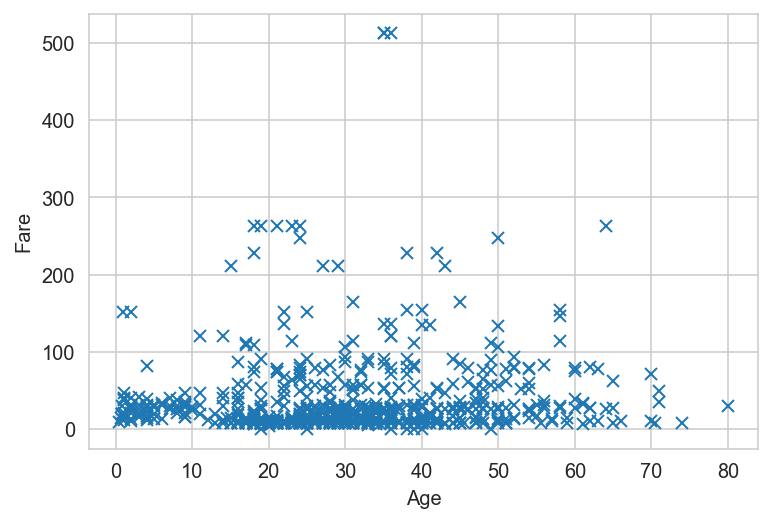

In [13]:
# Simple plot
x = titanic_dataframe['Age']
y = titanic_dataframe['Fare']
plt.plot(x, y, 'x')
plt.xlabel('Age')
plt.ylabel('Fare');

In [14]:
# Catplot plot represents share of survived passengers for different embarkment ports
sns.catplot?

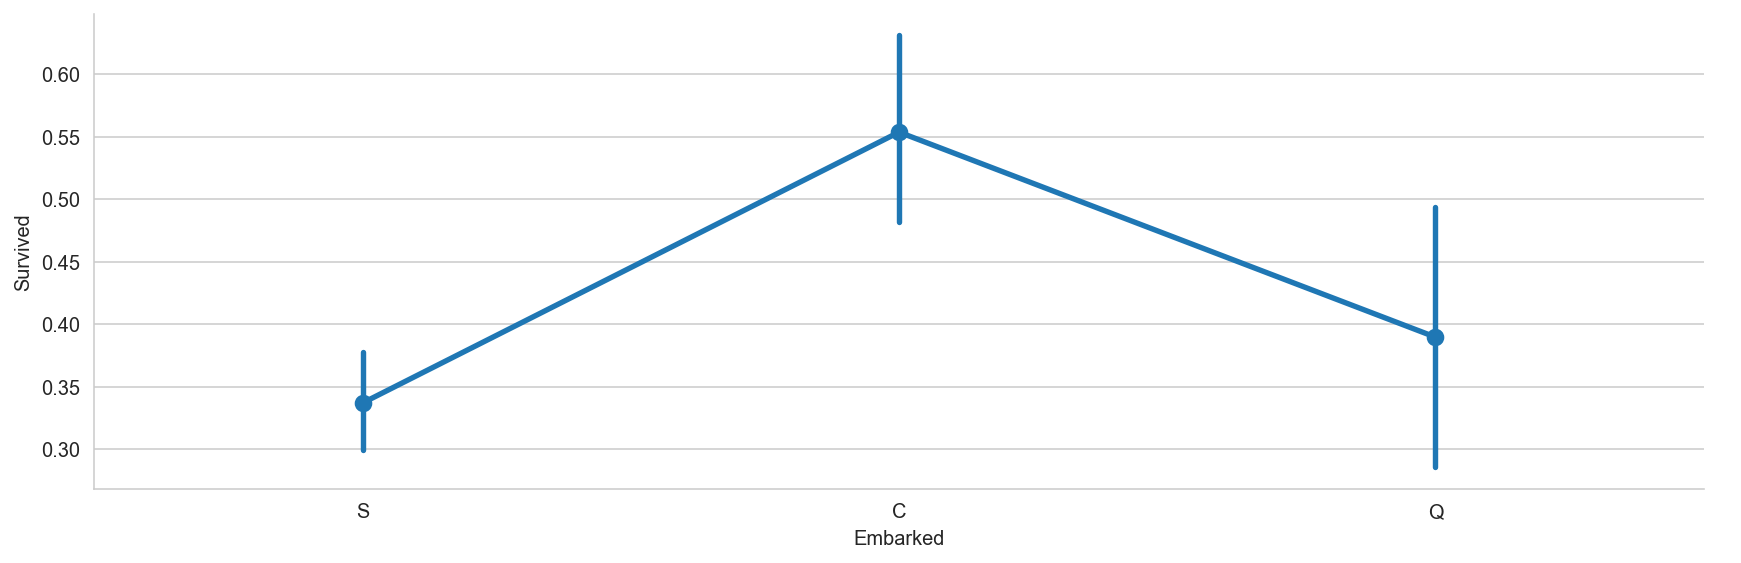

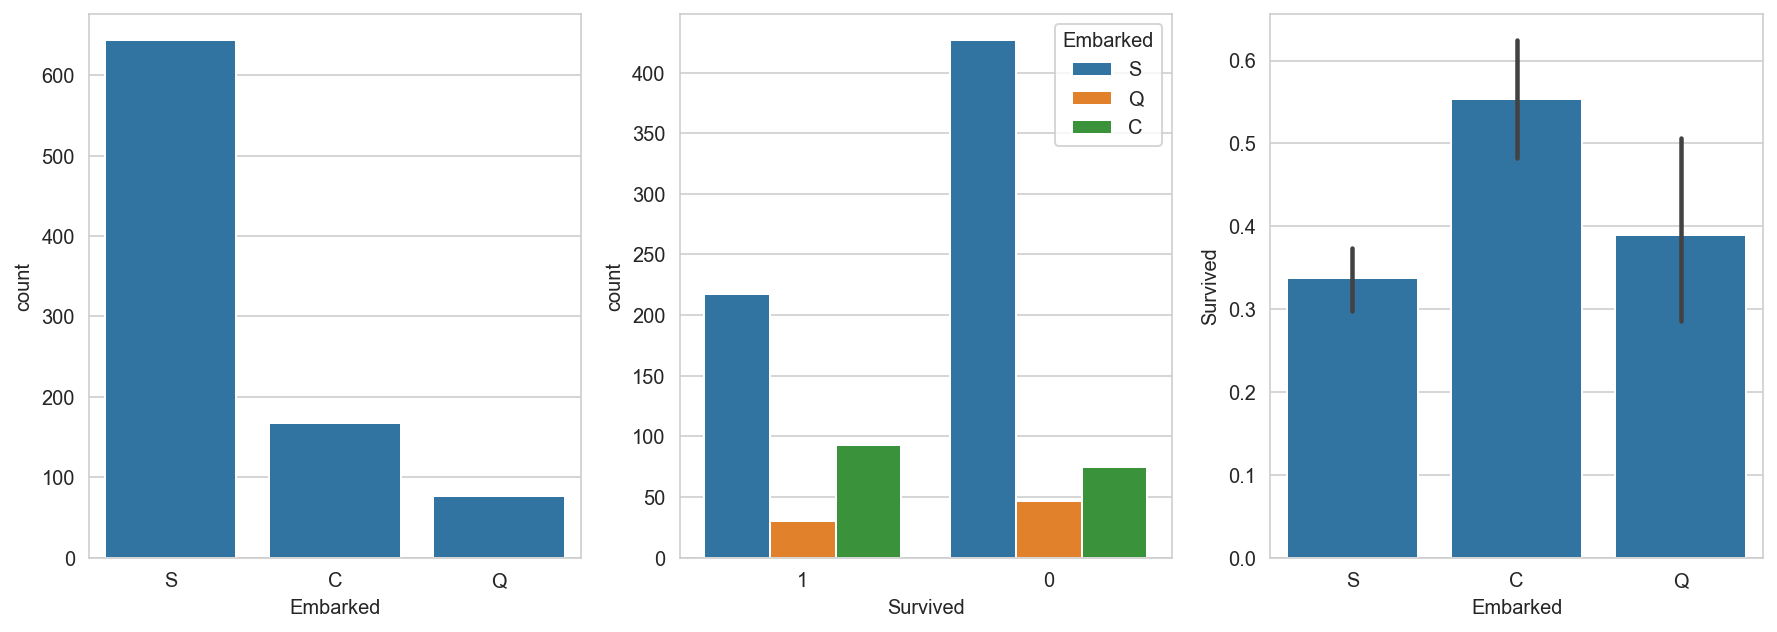

In [15]:
sns.catplot(x = 'Embarked', y = 'Survived', data=titanic_dataframe, height=4, aspect=3, kind = 'point')

figure_handle, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(15, 5))

sns.countplot(x='Embarked', data=titanic_dataframe, ax=axis1)
sns.countplot(x='Survived', hue="Embarked", data=titanic_dataframe , order=[1, 0], ax=axis2)

# group by embarked, and get the mean for survived passengers for each value in Embarked
sns.barplot(x='Embarked', y='Survived', data=titanic_dataframe[["Embarked", "Survived"]], order=['S','C','Q'], ax=axis3);

#### Task 1

Plot graphs by survivors and by survivors depending on the class.

In [16]:
# Your code


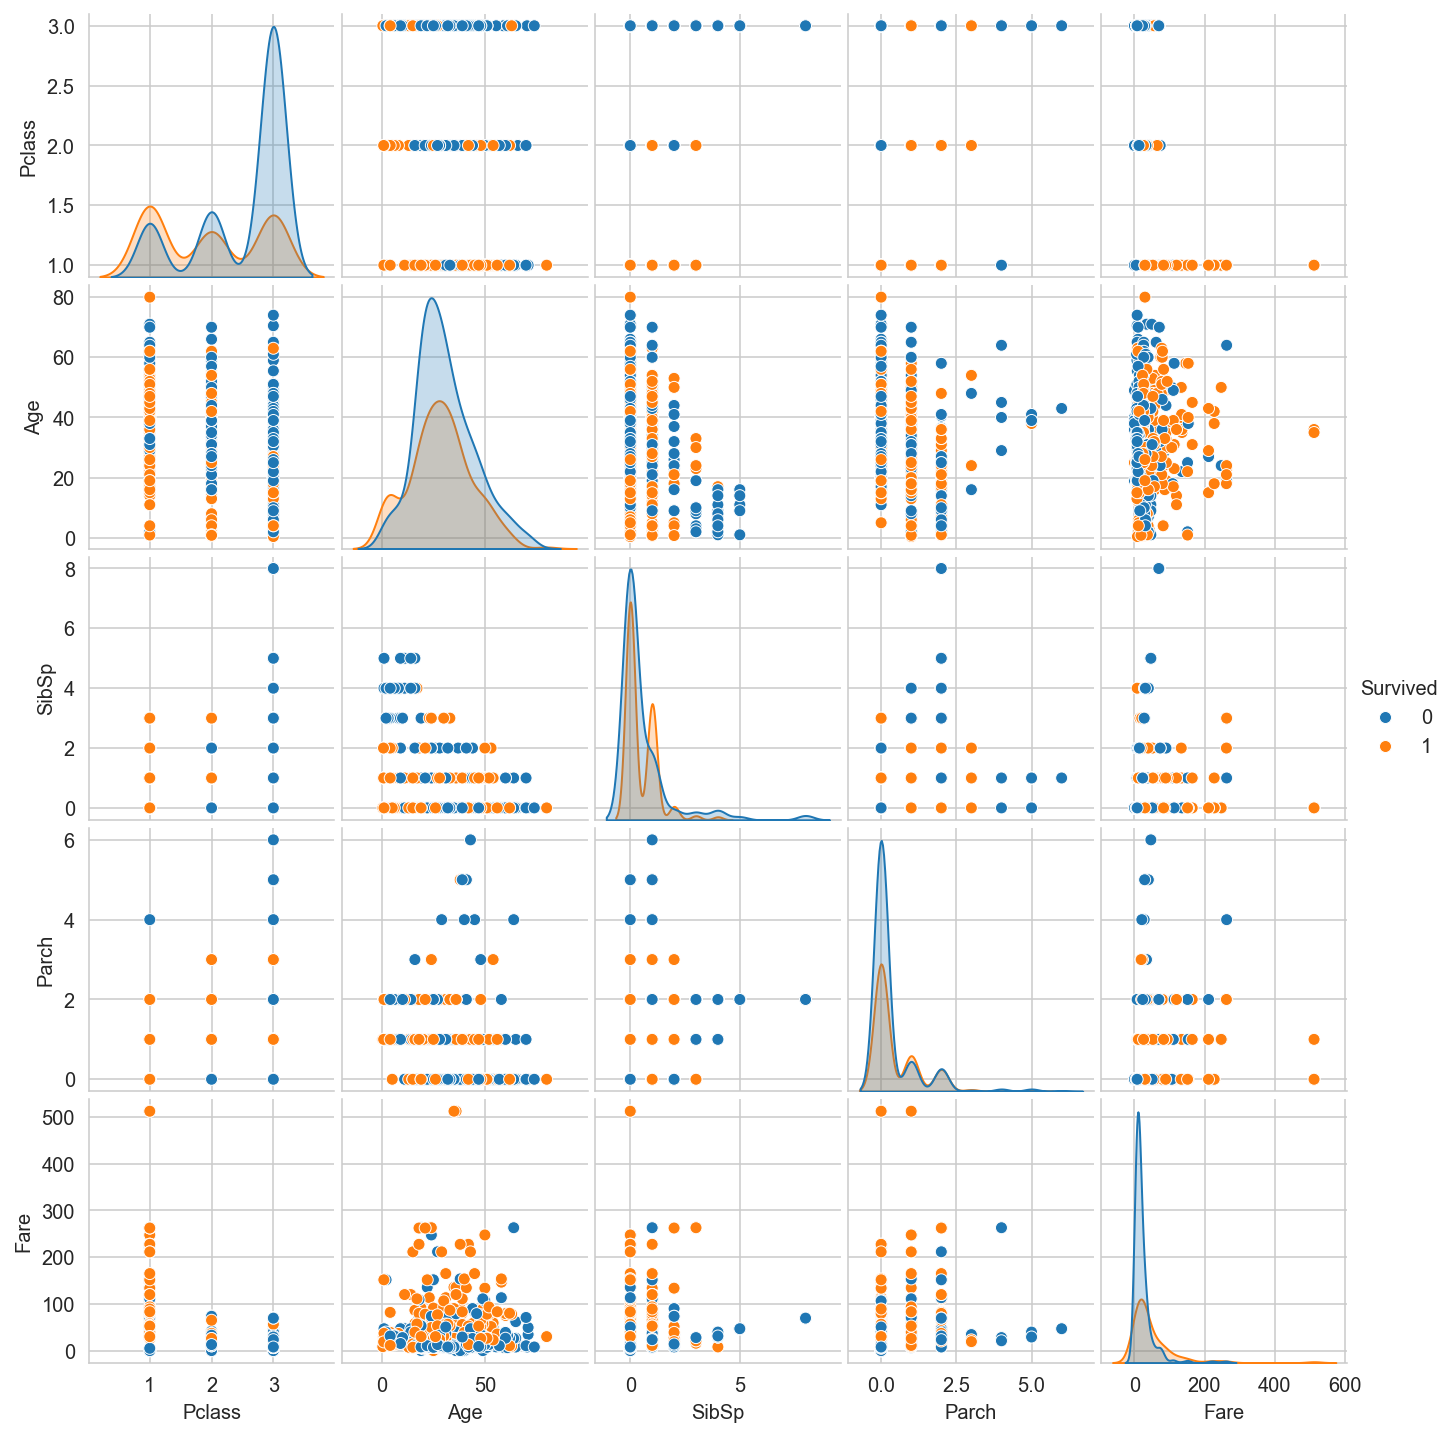

In [17]:
g = sns.pairplot(titanic_dataframe, hue="Survived");
g.fig.set_size_inches(10,10)

### Correlations in the data

Let $x$ and $y$ be $n$ dimensional vectors, then covariance:
$$
Cov(x,y) =\frac{\sum_i\left(x_i - \bar{x}\right)\left(y_i - \bar{y}\right)}{n-1} .
$$

Pearson correlation (linear):

$$
Corr(x,y) = \frac{Cov}{\sigma_x \sigma_y} .
$$

The Pearson correlation coefficient is simply a normalized covariance between two variables to give an interpretable estimate such that:
$$
Corr(x,y)  \in [-1, 1]
$$

![](https://drive.google.com/uc?export=view&id=1n78FZWGw6Lk1jDRjeZEtCCq34ay22ibo)

Pearson correlation assumptions:
1. The relationship between variables should be linear.

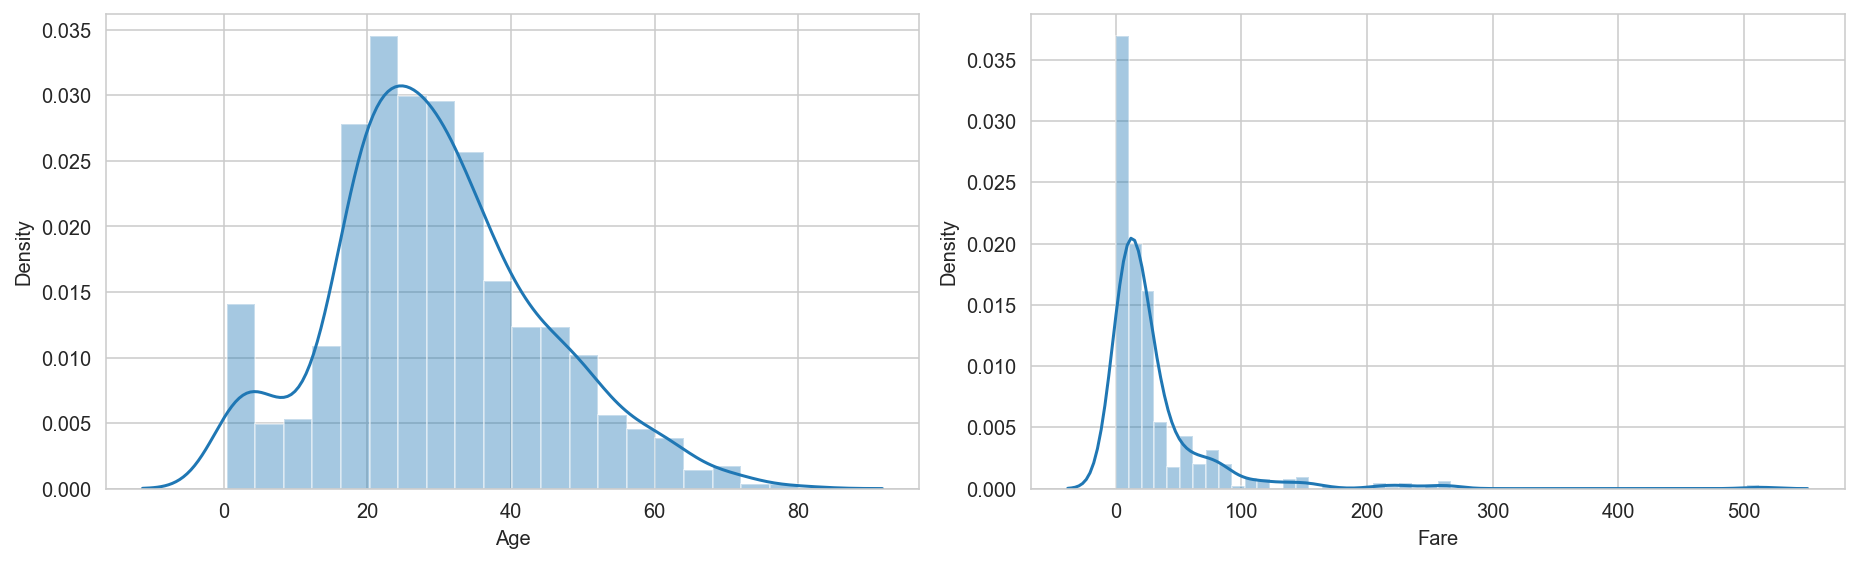

In [18]:
# Plot distribution of two features:
fig = plt.figure(1, (13,4))

ax = plt.subplot(1,2,1)
sns.distplot(titanic_dataframe['Age']);
ax.set_xlabel(f'Age')
plt.tight_layout()

ax = plt.subplot(1,2,2)
sns.distplot(titanic_dataframe['Fare']);
ax.set_xlabel(f'Fare')
plt.tight_layout()

In [19]:
import scipy.stats as stats
# calculate the correlation
titanic_dataframe_nonan = titanic_dataframe.dropna()
corr, p = stats.pearsonr(titanic_dataframe_nonan['Age'], titanic_dataframe_nonan['Fare'])

print('Correlation:', round(corr,2))

Корреляция: -0.09


#### Missing values

In [20]:
print('Number of missing values of age:', titanic_dataframe["Age"].isnull().sum())

Number of missing values of age: 177


How to deal with the missing values:

- Delete signs or observations with missing values of `dropna()`:
    - `+` is easy to use;
    - `-` Reducing the size of the dataset;
    - `-` Loss of information;
- Filling with the average or median value of `fillna(mean_value)`:
    - `+` is easy to use;
    - `+` Mean and median can provide a good estimate of missing values;
    - `-` Works only for numerical values;
    - `-` Sensitivity to outliers in data;
- Filling with random values:
    - `+` Can be applied to both categorical and numerical features;
    - `+` Introduces less distortion to the variance;
    - `-` does not work in every situation, as it can introduce noise into the data, which will lead to incorrect statistical conclusions;

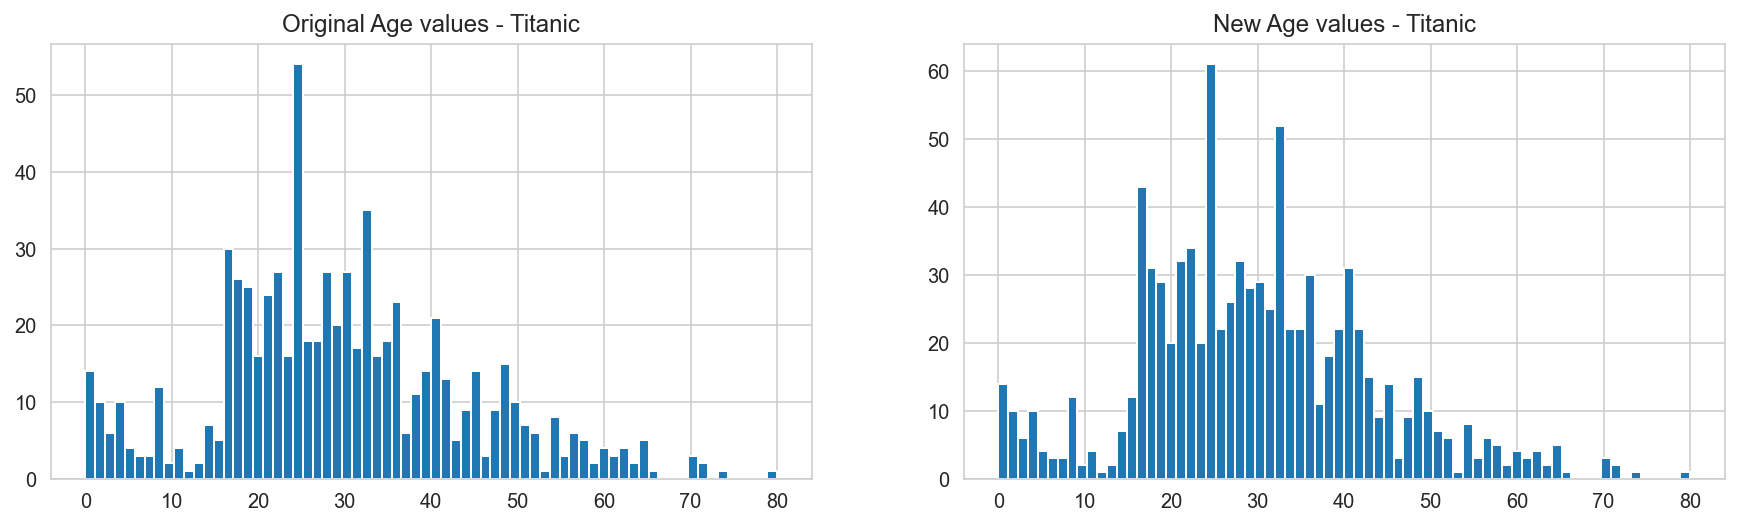

In [21]:
# Prepare plots to see distributions of age
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(15, 4))
axis1.set_title(r'Original Age values - Titanic')
axis2.set_title(r'New Age values - Titanic')

# get average, std, and number of NaN values in titanic_df
average_age_titanic = titanic_dataframe["Age"].mean()
std_age_titanic = titanic_dataframe["Age"].std()
count_nan_age_titanic = titanic_dataframe["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
random_ages = np.random.randint(average_age_titanic - std_age_titanic,
                                average_age_titanic + std_age_titanic,
                                size=count_nan_age_titanic)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_dataframe['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_dataframe.loc[np.isnan(titanic_dataframe["Age"]), "Age"] = random_ages

# convert from float to int
titanic_dataframe['Age'] = titanic_dataframe['Age'].astype(int)

# plot new Age Values
titanic_dataframe['Age'].hist(bins=70, ax=axis2);

# Types of tasks

## Classification task:
* $Y = \{-1, +1\}$ - classification into 2 classes (binary);
* $Y = \{1, \ldots, M\}$ - classification into $M$ disjoint classes. In this case, the entire set of objects $X$ is divided into classes and the algorithm $a(x)$ should answer the question "which class does $x$ belong to?".

## Regression recovery task:
* $Y = \mathbb{R}$ or $Y = \mathbb{R}^m$

## Forecasting task
`Forecasting tasks` are special cases of classification or regression, when $x\in X$ is a description of the past behavior of an object $x$, $y\in Y$ is a description of some characteristics of its future behavior.

##  Learning method

`Train` - based on the sample $X^l =\big(x_i, y_i\big)_{i=1}^{l}$ we build the algorithm $a \in A$.

`Test` - having the algorithm $a\in A$ to new objects $x^\prime$, we get the answers $y^\prime = a(x^\prime)$.


## The problem of underfitting and overfitting:

![](https://drive.google.com/uc?export=view&id=1AoPF0vlVTZ10D2X1rOB_9A3zMrdvoe7X)

* `Underfitting`: the model is too simple, the number of parameters $n$ is insufficient.

* `Overfitting`: the model is too complex, there is an excessive number of parameters $n$.

![](https://drive.google.com/uc?export=view&id=1xfQCQaBCW_tHdD__TwSfBrRtBbu3Q6k3)

`What causes overfitting?`
* excessive complexity of the pamameter space, extra degrees of freedom in the model $g(x, θ)$ are "spent" on overly accurate fitting to the training sample $X^l$;
* overfitting is always there when there is a choice ($a$ from $A$) based on incomplete information (according to the final sample $X^l$).


`How to detect overfitting?`
* empirically, by dividing the sample into $\text{train}$ and $\text{test}$, and the correct answers should be known for $\text{test}$.


`You can't get rid of him. How to minimize it?`
* minimize using `HoldOut`, `LOO` or `CV`, but be careful!!!
* impose restrictions on $θ$ (regularization).

# Cross-validation (CV)

An `external criterion` evaluates the quality of "out-of-training", for example, by a hold-out control sample $X^k$:
\begin{equation}
    Q_{\mu}\big(X^\ell, X^k\big) = Q\big(\mu\big(X^\ell\big), X^k\big).
\end{equation}

Averaging `hold-out` estimates over a given $N$ - set of partitions $X^L = X_n^{\ell} \bigcup X_n^{k}, \quad n = 1, \ldots, N$:

\begin{equation}
    \text{CV}\big(\mu, X^L\big) = \frac{1}{\vert N\vert} \sum_{n \in N} Q_{\mu}\big(X_n^{\ell}, X_n^{k}\big).
\end{equation}

Special cases are different ways of setting $N$.
* A random set of partitions.
* Complete cross-validation (CCV): $N$ is the set of all $C_{\ell+k}^{k}$ partitions.

`Disadvantage:` CCV estimation is computationally too complicated. Either small values of $k$ or combinatorial estimates of CCV are used.

* `Sliding control` (Leave One Out CV): $~k=1$,
\begin{equation}
    \text{LOO}\big(\mu, X^L\big) = \frac{1}{L} \sum_{n \in N} Q_{\mu}\big(X^L \backslash \{x_i\}, \{x_i\}\big).
\end{equation}


`Disadvantage:` $\text{LOO}$: resource intensive, high variance.


* `Cross-checking` on $q$ blocks ($q$-fold CV): randomly splitting $X^L=X_1^{\ell_1}\bigcup\ldots X_q^{\ell_q}$ into $q$ blocks of (almost) equal length,

\begin{equation}
    \text{CV}_q\big(\mu, X^L\big) = \frac{1}{q} \sum_{n=1}^{q} Q_{\mu}\big(X^L \backslash X_n^{\ell_n}, ~X_n^{\ell_n}\big).
\end{equation}

The `disadvantage` of $q$-fold CV:
* the score depends significantly on the division into blocks;
* Each object participates in the control only once.

![](https://drive.google.com/uc?export=view&id=1W0It3dugIF0L3VmbNdZex0VMrV28WA3R)

# Regression Training

`Training sample:` $X^\ell = \big(x_i,~y_i\big)_{i=1}^{\ell}, \quad x_i \in \mathbb{R}^n, \quad y_i \in \mathbb{R}$

* Regression model - __linear__:
\begin{equation}
  a(x, θ) = \sum_{j=1}^{n} θ_j f_j(x), \quad θ \in \mathbb{R}^n
\end{equation}

* The loss function is __quadratic__:
\begin{equation}
  \mathscr{L}(a,~y) = \big(a - y\big)^2
\end{equation}

## Practice

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import gridspec
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import LeaveOneOut, KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler


%matplotlib inline
%config InlineBackend.figure_format='retina'

np.random.seed(4242)

#### Linear case with noise

In [23]:
# set the parameters with respect to the problem statement
points = np.arange(20, 120)

v0_real = 3
a_real = 2
v_real = v0_real + a_real * points # observations without noise

v = v_real + np.random.normal(loc=0, scale=10, size=points.shape) # observations with noise

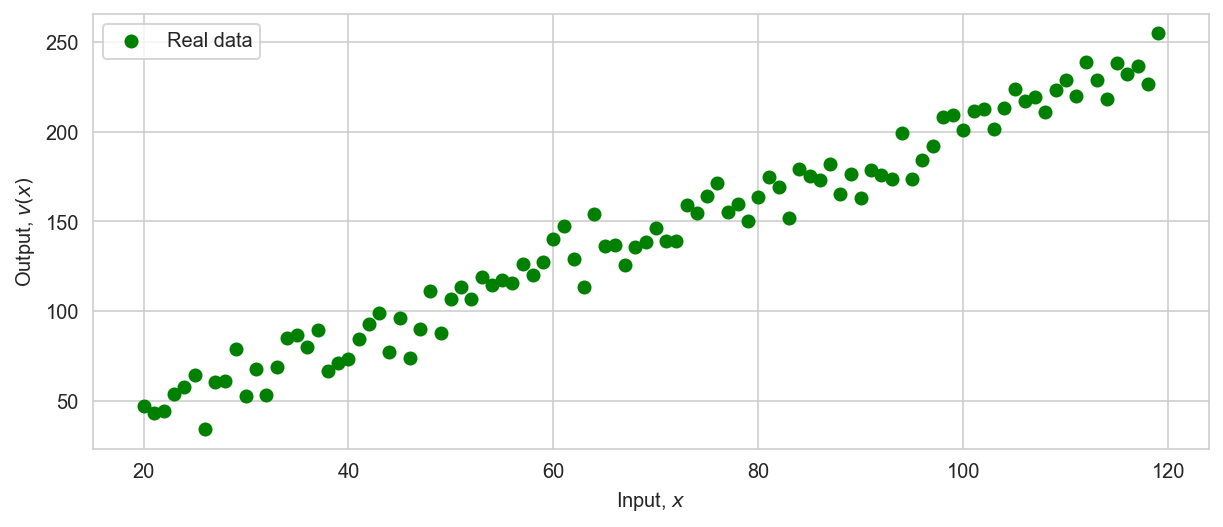

In [24]:
plt.figure(figsize=(10, 4))
plt.xlabel(r'Input, $x$')
plt.ylabel(r'Output, $v(x)$')

plt.scatter(points, v, label='Real data', color='g')
plt.legend();

In [25]:
LinearRegression?

In [26]:
# Define model
regression = LinearRegression()
# add bias to data
X = np.ones((points.shape[0], 2))
X[:, 1] = points
v = v.reshape(-1, 1)
regression.fit(X, v) # train model

LinearRegression()

In [27]:
bias, theta = regression.coef_[0]


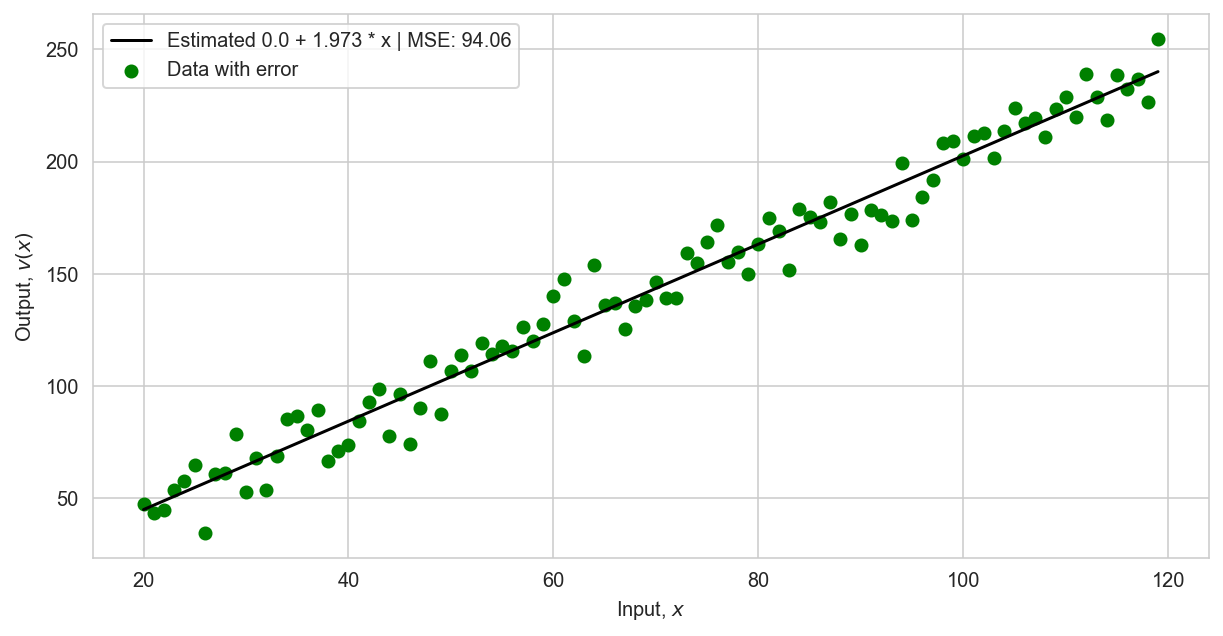

In [28]:
plt.figure(figsize=(10, 5))

plt.xlabel(r'Input, $x$')
plt.ylabel(r'Output, $v(x)$')

v_estimate = regression.predict(X)[:, 0]
plt.plot(points, v_estimate, label=f"Estimated {round(bias, 3)} + {round(theta, 3)} * x | MSE: {np.round(mean_squared_error(v, v_estimate), 2)}", color='k', lw=1.5);
plt.scatter(points, v, label=r'Data with error', color='g')
plt.legend();

### Nonlinear case (feature extraction)

Many functions are non-linear. Let's take an example:

$$
y(x) = cos\Big(\frac{x}{10}\Big)
$$

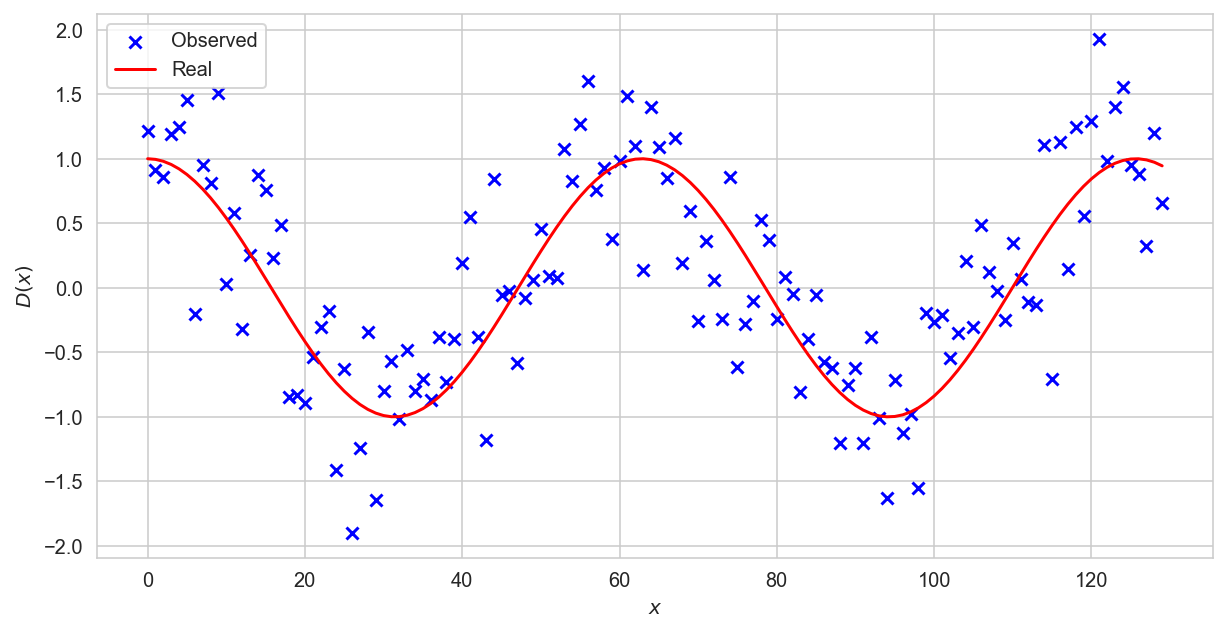

In [29]:
np.random.seed(4242)
def D(t):
    return np.cos(t/10)

x = np.arange(0, 130)

y_real = D(x)

eps = np.random.normal(0, scale=0.5, size=x.shape)

y = y_real + eps

plt.figure(figsize=(10, 5))

plt.scatter(x, y, label=r'Observed', color='b', marker='x')
plt.plot(x, y_real, label=r'Real', color='r')
plt.xlabel(r'$x$')
plt.ylabel(r'$D(x)$')
plt.legend();

#### Polynomial signs of degree $n$

The graph shows that the dependence is nonlinear. Without knowing the function, we can only assume a dependency.

$$a^*(x) = \theta_1 x^1 + \theta_2 x^2 + \ldots \theta_n x^n + b = \theta^{T} X $$

In [30]:
# Define a function to create polinomial features
def make_polynomial_features(x_train, p):
    poly = np.zeros(shape = (len(x_train), p + 1))
    poly[:, 0] = 1
    for i in range(1, p + 1):
        poly[:, i] = np.power(x_train, i).reshape((len(x_train),))
    return poly

#### Task 2

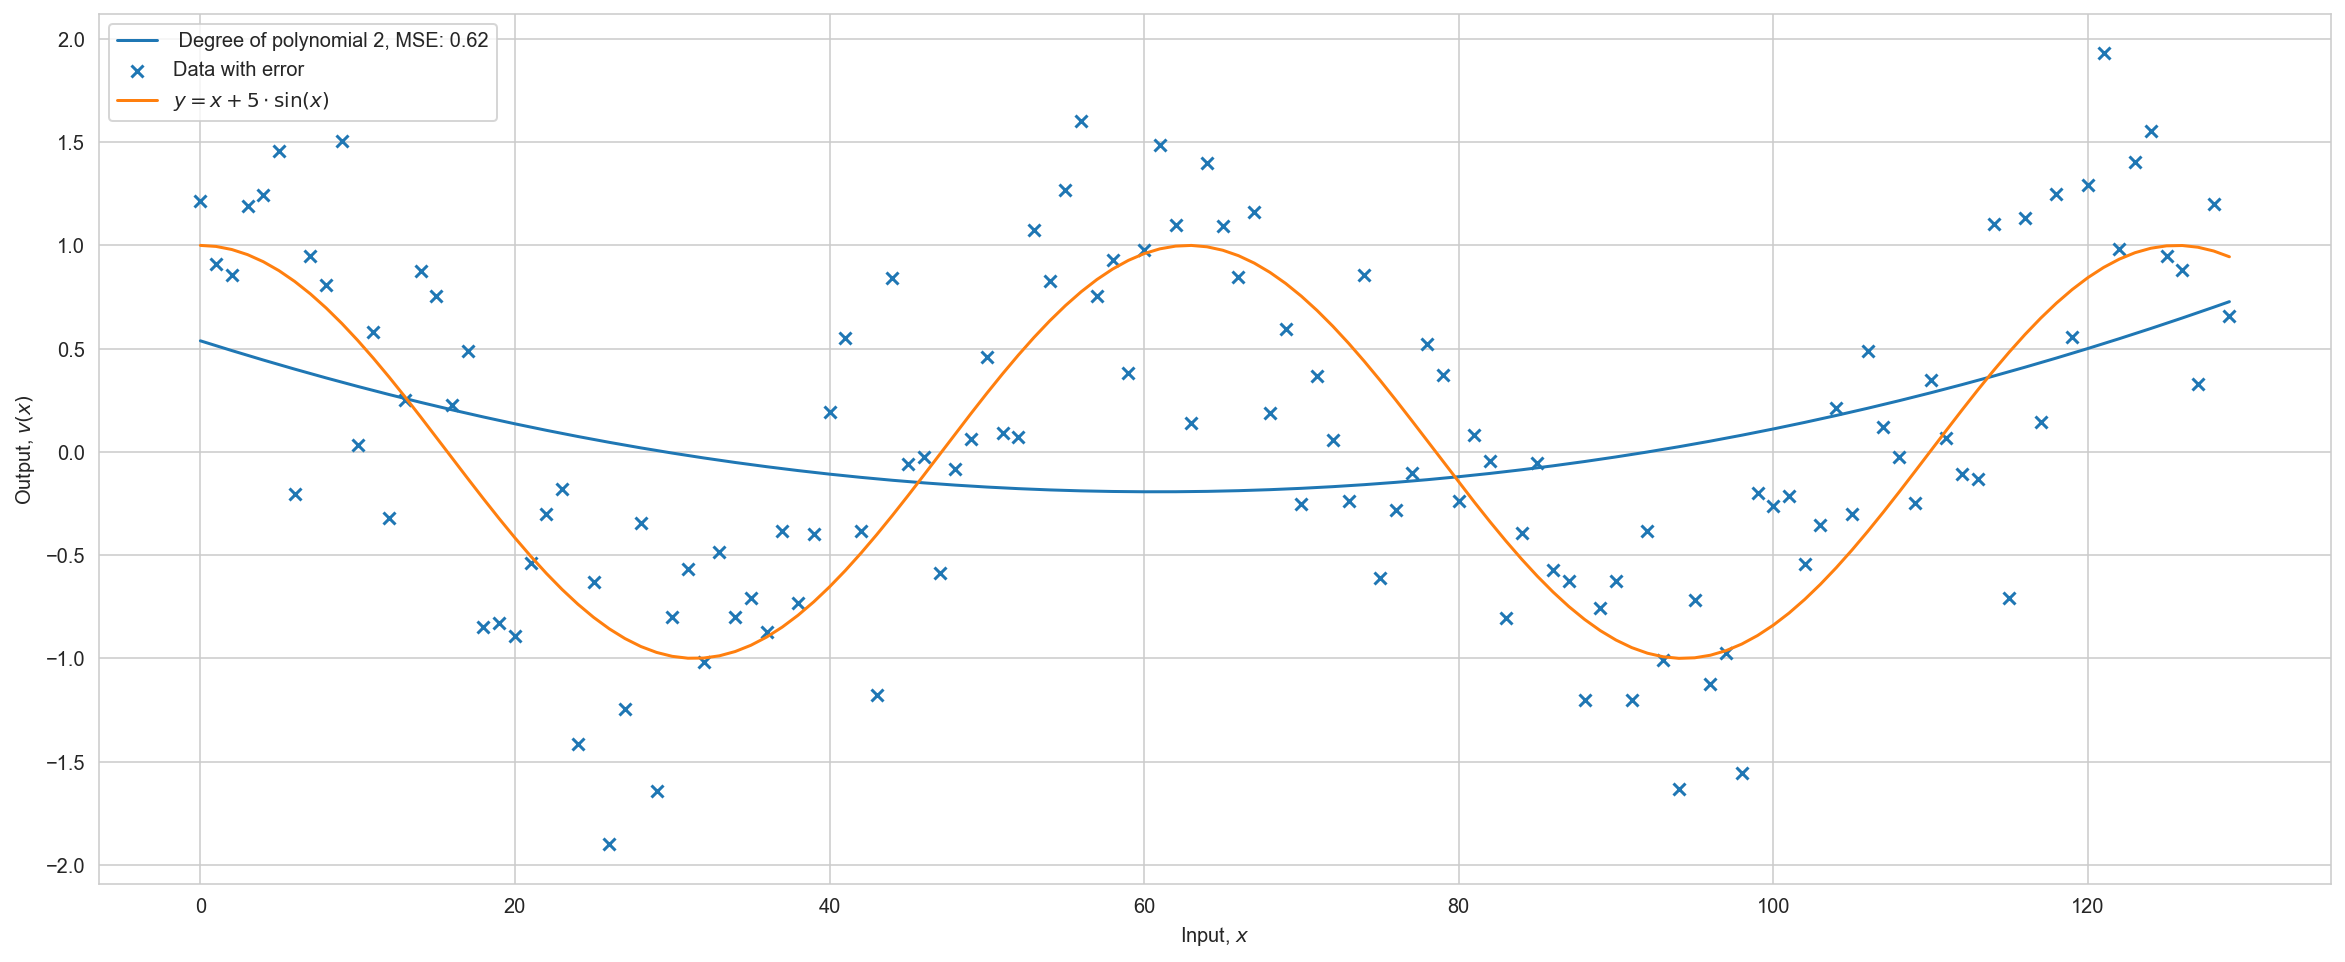

In [31]:
plt.figure(figsize=(20, 8))

plt.xlabel(r'Input, $x$')
plt.ylabel(r'Output, $v(x)$')
# Add degrees to the list and see how the prediction behaves
# Try adding a higher degree > 100
for p in [2]:
    x_poly = make_polynomial_features(x, p=p)
    model = LinearRegression().fit(x_poly, y)

    y_estimate = model.predict(x_poly)
    plt.plot(x, y_estimate, label=f" Degree of polynomial {p}, MSE: {round(mean_squared_error(y, y_estimate), 2)}", lw=1.5);

plt.scatter(x, y, marker='x', label=r'Data with error')
plt.plot(x, y_real, label=r'$y = x + 5 \cdot \sin(x)$')
plt.legend();

There is an obvious overfitting, but the metric on the training sample decreases with increasing degree of the polynomial. Let's divide the dataset into training and test samples. And we will look at the metric on the test sample.

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

#### Task 3

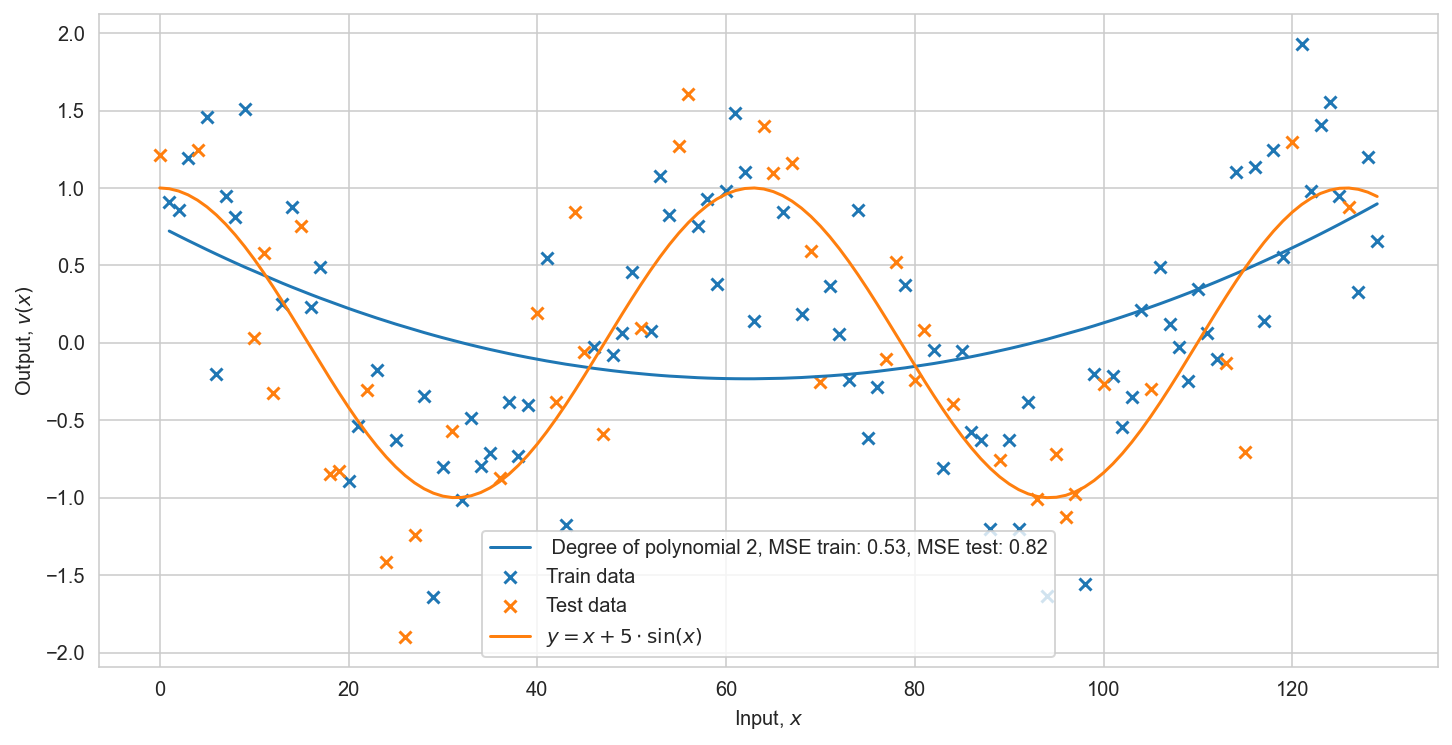

In [33]:
plt.figure(figsize=(12, 6))

plt.xlabel(r'Input, $x$')
plt.ylabel(r'Output, $v(x)$')
# Add degrees to the list and see how the metric behaves on the test

for p in [2]:
    x_poly = make_polynomial_features(X_train, p=p)
    model = LinearRegression().fit(x_poly, y_train)

    y_estimate_train = model.predict(x_poly)
    y_estimate_test = model.predict(make_polynomial_features(X_test, p=p))
    plt.plot(np.sort(X_train), y_estimate_train[np.argsort(X_train)], label=f" Degree of polynomial {p}, MSE train: {round(mean_squared_error(y_train, y_estimate_train), 2)}, MSE test: {round(mean_squared_error(y_test, y_estimate_test), 2)}", lw=1.5);

plt.scatter(X_train, y_train, marker='x', label=r'Train data')
plt.scatter(X_test, y_test, marker='x', label=r'Test data')
plt.plot(x, y_real, label=r'$y = x + 5 \cdot \sin(x)$')
plt.legend(loc='best');

# Training classification model:

`Train sample:` $X^\ell = \big(x_i,~y_i\big)_{i=1}^{\ell}, \quad x_i \in \mathbb{R}^n, \quad y_i \in \{-1,~+1\}$


* Classification model - __linear__:
\begin{equation}
  a(x, θ) = \text{sign} \big(\sum_{j=1}^{n} θ_j f_j(x)\big), \quad θ \in \mathbb{R}^n
\end{equation}

* The loss function is __binary__ or its __approximation__::
\begin{equation}
  \mathscr{L}(a,~y) = [ay < 0] = \big[x^\top θ \cdot y < 0\big] \le \mathscr{L}\big(x^\top θ \cdot y)
\end{equation}

### Practice

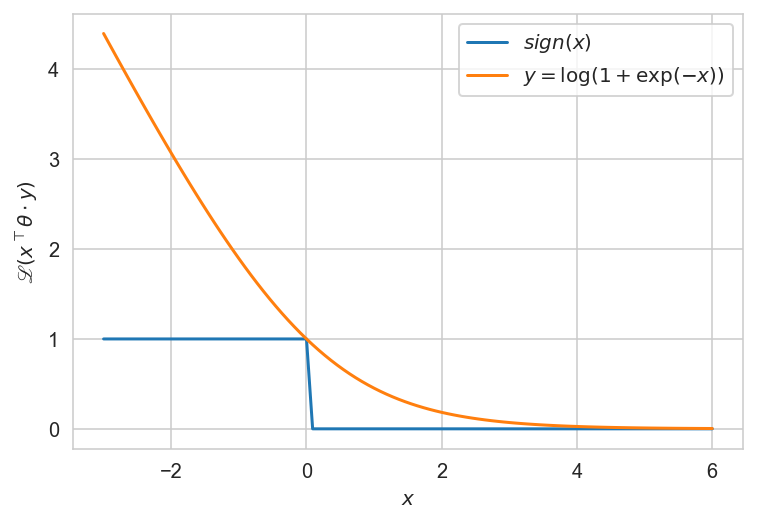

In [34]:
def sign(x):
    return np.array(x <= 0, dtype=np.int64)

def upper_bound(x):
    return np.log2(1+np.exp(-x))

x = np.linspace(-3, 6, 100)
plt.plot(x, sign(x), label=r'$sign(x)$')
plt.plot(x, upper_bound(x), label=r'$y = \log(1+\exp(-x))$')

plt.xlabel(r'$x$')
plt.ylabel(r'$\mathscr{L}(x^\top θ \cdot y)$')
plt.legend(loc='best')
plt.show();

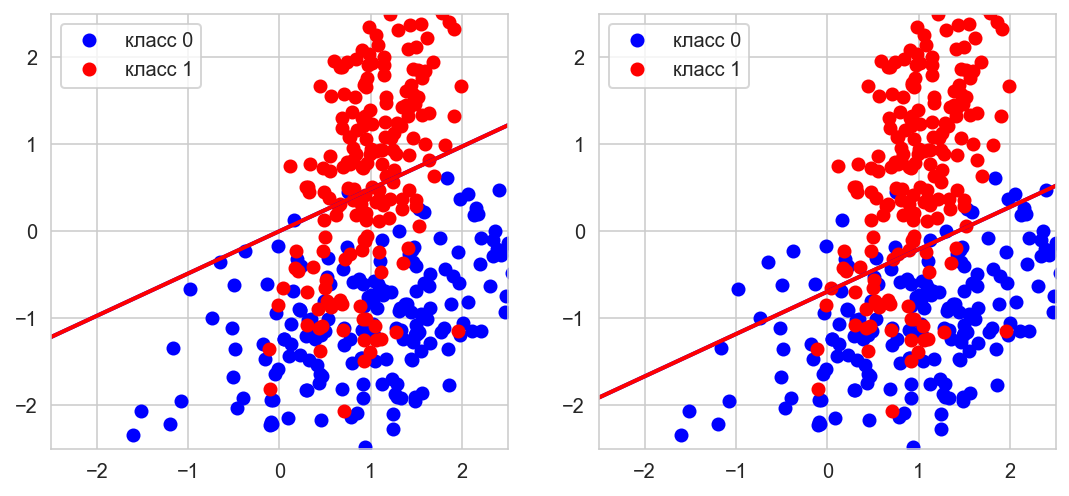

In [35]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=400, n_features=2,
                           n_informative=2, n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

# Adding constant
X = np.hstack([X, np.ones([len(X), 1])])

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==0, dtype=np.int64))

def get_line(a, b, c=0, x_min=-10, x_max=10):
    x1, y1 = -(-model.coef_[0][1] + c)/model.coef_[0][0], -1
    x2, y2 = -(model.coef_[0][1] + c)/model.coef_[0][0], 1

    polynomial = np.poly1d(np.polyfit([x1, x2], [y1, y2], 1))
    x_axis = np.linspace(x_min, x_max)
    y_axis = polynomial(x_axis)

    return x_axis, y_axis


cols = ['blue', 'red']
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].set_xlim((-2.5, 2.5)), ax[i].set_ylim((-2.5, 2.5))

for k in np.unique(y):
    ax[0].plot(X[y==k,0], X[y==k,1], 'o',
               label='класс {}'.format(k), color=cols[k])
    ax[1].plot(X[y==k,0], X[y==k,1], 'o',
               label='класс {}'.format(k), color=cols[k])

# let's plot results with and without the constant
for k in np.unique(y):
    ax[0].plot(*get_line(*model.coef_[0][:2]), linewidth=2, color=cols[k])
    ax[1].plot(*get_line(*model.coef_[0]), linewidth=2, color=cols[k])

ax[0].legend(loc='best'), ax[1].legend(loc='best')
plt.show();

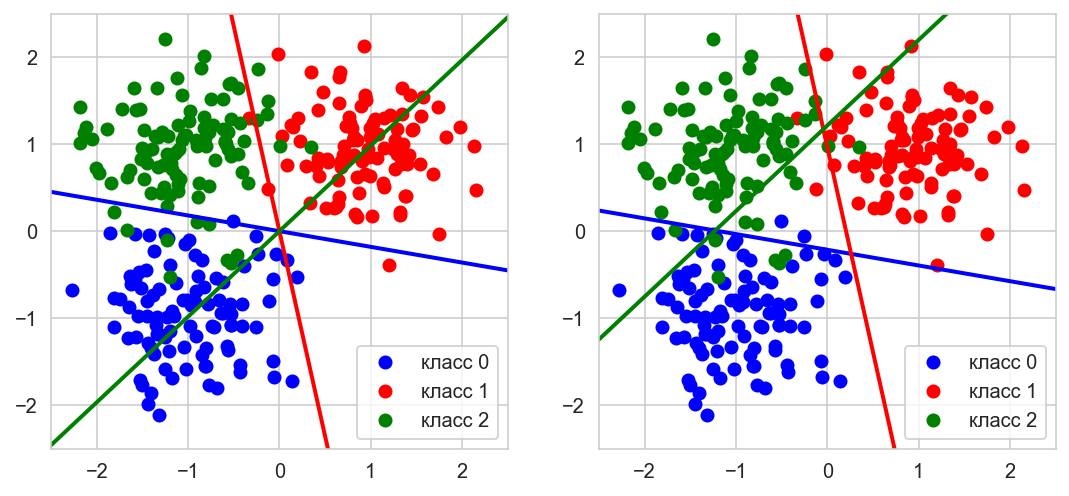

In [36]:
# Data generation
np.random.seed(0)
l = 100
n = 2
# Lets generate three Gaussian
X1 = np.array([[-1,-1]]) + 0.5*np.random.randn(l, n)
X2 = np.array([[1,1]]) + 0.5*np.random.randn(l, n)
X3 = np.array([[-1,1]]) + 0.5*np.random.randn(l, n)

X = np.vstack([X1, X2, X3])
# target vector
y = np.hstack([[0]*l, [1]*l, [2]*l])

# Adding a constant
X = np.hstack([X, np.ones([len(X), 1])])

# list to add trained models for prediction of one class
models = []

# fit_intercept is a constant (a.k.a. bias or intercept) should be
# added to the decision function.

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==0, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==1, dtype=np.int64))
models.append(model)

model = LogisticRegression(random_state=0, max_iter=2000, fit_intercept=False)
_ = model.fit(X, np.array(y==2, dtype=np.int64))
models.append(model)

def get_line(a, b, c=0, x_min=-10, x_max=10):
    x1, y1 = -(-models[k].coef_[0][1] + c)/models[k].coef_[0][0], -1
    x2, y2 = -(models[k].coef_[0][1] + c)/models[k].coef_[0][0], 1

    polynomial = np.poly1d(np.polyfit([x1, x2], [y1, y2], 1))
    x_axis = np.linspace(x_min, x_max)
    y_axis = polynomial(x_axis)

    return x_axis, y_axis

cols = ['blue', 'red', 'green']
fig, gs = plt.figure(figsize=(9,4)), gridspec.GridSpec(1, 2)

ax = []
for i in range(2):
    ax.append(fig.add_subplot(gs[i]))
    ax[i].set_xlim((-2.5, 2.5)), ax[i].set_ylim((-2.5, 2.5))

for k in np.unique(y):
    ax[0].plot(X[y==k,0], X[y==k,1], 'o',
               label='класс {}'.format(k), color=cols[k])
    ax[1].plot(X[y==k,0], X[y==k,1], 'o',
               label='класс {}'.format(k), color=cols[k])

# let's plot results with and without the constant
for k in np.unique(y):
    ax[0].plot(*get_line(*models[k].coef_[0][:2]), linewidth=2, color=cols[k])
    ax[1].plot(*get_line(*models[k].coef_[0]), linewidth=2, color=cols[k])

ax[0].legend(loc='best'), ax[1].legend(loc='best')
plt.show();

# Analysis of classification errors


The task of classification into `two classes`, $y_i\in \{-1,~+1\}$.

`Classification algorithm` $a(x_i) \in \{-1,~+1\}$.

By applying the algorithm $a(x)$ to objects $x$, we can get $4$ possible situations:


![](https://drive.google.com/uc?export=view&id=1zfrRBSZhAs3RZeLYhUKeo0RsDPpPXjm-)

`Positive / Negative` - which answer was given by the classifier $a(x)$. `True / False` - the classifier gave the correct answer or made a mistake.


__Number of correct classifications__ (the more, the better):
\begin{equation}
  \text{Accuracy} = \frac{1}{\ell}\sum_{i=1}^{\ell}\big[a(x_i) = y_i\big] = ~\frac{\text{TP} + \text{TN}}{\text{FP} + \text{FN} + \text{TP} + \text{TN}}
\end{equation}

`!!! Disadvantage !!!`: does not take into account either the number (imbalance) of classes, or the cost of an error on objects of different classes.

__For example__: if there is $100$ times more samples of one class than another class. If the algorithm $a(x)$ is wrong on all objects of a small class, then we will have only $1\%$ error. It seems that $1\%$ error is good enough, but we have not solved the task correctly.

# Loss functions depending on the error penalty

The task of classification into `two classes`, $y_i\in \{-1,~+1\}$.

`Classification model` $a(x;w, w_0) = \text{sign}\big(g(x,w) - w_0\big)$, where $w_0$ is a free term.

#### __How the classifier works critically depends on $w_0$!__


Depending on how we move the value of $w_0$, it will depend on how many objects $x_i$ will be such that $a(x_i) = +1$. That is, the balance of classes is on the conscience of the bias term $w_0$. In principle, you can divide the task into two parts: build $g(x,w)$, and then define $w_0$ separately.

`How can the different cost of classes be taken into account?`
* Class cost - Class capacity;
* Class cost - One class may be more important to the task than another.

Let $λ_y$ be the penalty for an error on objects of class $y$.

The `loss function` now depends on penalties:
\begin{equation}
  \mathscr{L}(a, ~y) = \lambda_{y_i}\big[a(x_i; ~w, w_0) \not = y_i \big] = \lambda_{y_i}\big[\big(g(x_i; ~w) - w_0 \big)y_i < 0\big].
\end{equation}

`The problem:`
In practice, fines of $\{\lambda_{y_i}\}$ can be reviewed:
* We need a convenient way to select $w_0$ depending on $\{\lambda_{y_i}\}$, which does not require retraining of the model.
* We need a characteristic of the quality of the model $g(x,w)$, independent of the penalties $\{\lambda_{y_i}\}$ and the number of classes.

# Definition of the ROC curve

The error curve is `ROC (receiver operating characteristic)`.
Each point of the curve corresponds to some $a(x;w, w_0)$.

* on the X axis: `(FPR - false positive rate)`:
\begin{equation}
  \\text{FPR} = \frac{\sum_{i=1}^{\el}\big[ y_i = -1\big]\big[a(x_i; w, w_0) = +1\big]}{\sum_{i=1}^{\el}\big[ y_i = -1\big]}
\end{equation}

* * on the Y axis: `(TPR - true positive rate)`:

\begin{equation}
  \\text{TPR} = \frac{\sum_{i=1}^{\el}\big[ y_i = +1\big]\big[a(x_i; w, w_0) = +1\big]}{\sum_{i=1}^{\el}\big[ y_i = +1\big]}
\end{equation}

$1 - \text{FPR}$ is called the `specificity` of the algorithm $a$, $\text{TPR}$ is called the `sensitivity` of the algorithm $a$.

The smaller the $\text{FPR}$, the better. The more $\text{TPR}$, the better.

# ROC-curve and AUC (Area Under Curve)


In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.svm import SVC, SVR
from sklearn.metrics import auc

X, Y = make_classification(n_samples=400, n_features=2,
                           n_informative=2, n_classes=2,
                           n_redundant=0,
                           n_clusters_per_class=1,
                           random_state=0)

It is useful to divide the sample not only into `train` and `test`, but also into a validation sample, `val`.
In this case, the validation sample is used to select the model or set of hyperparameters that you would like to use.
A test sample is used to evaluate how your model will work with invisible data.

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=100,
                                                    random_state=0)

X_train_, X_val, Y_train_, Y_val = train_test_split(
    X_train, Y_train, test_size=100, random_state=0)

In [39]:
model = SVC(probability=True)
_ = model.fit(X_train_, Y_train_)

fpr, tpr, thresholds = roc_curve(
    Y_val, model.predict_proba(X_val)[:,1], pos_label=1)

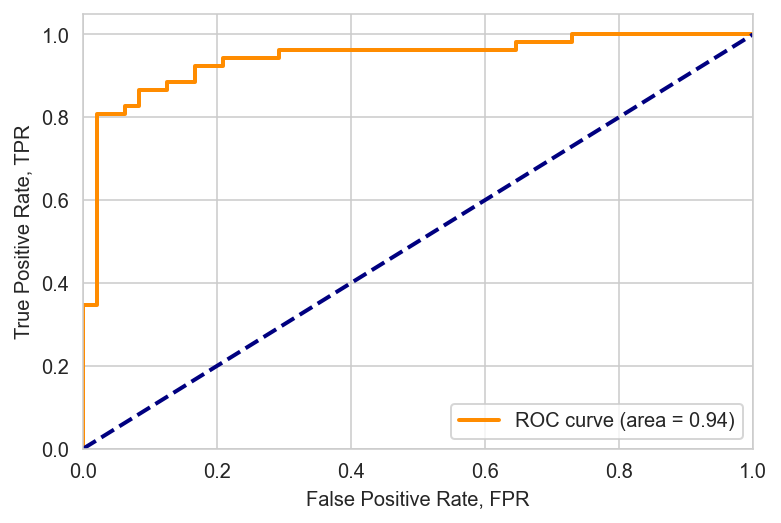

In [40]:
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label=r'ROC curve (area = {})'.format(round(auc(fpr, tpr), 2)))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel(r'False Positive Rate, FPR')
plt.ylabel(r'True Positive Rate, TPR')
plt.legend(loc="lower right")
plt.show()

The area under the `ROC curve` is $=0.94$ in the validation sample. Now, based on this, you need to select a `threshold` somehow, i.e. you need to select the threshold in such a way that there is a maximum of `TP` and a minimum of `FP` at the same time. The optimal threshold is located at the intersection of `TPR` and `1 - FPR`.

The `diagonal` is a classifier that is ideally bad, i.e. that always makes half the mistakes. The `ideal classifier` is the one with the area under the `ROC curve` $→ 1$. The upper left corner is the point where the ideal classifier is located. The curve itself is constructed exclusively by $g(x; w, w_0)$ and does not depend on $w$, and the choice of a point on this curve is the choice of a free member of $w_0$.

The area under the `ROC curve` is estimated only by $w$, without looking at $w_0$.


`AUC` is the proportion of correctly ordered pairs $\big(x_i, y_i\big)$, i.e. between the pair $(i, j)$ is the correct order ratio for the answers: $\big[y_i <y_j\big]$. And the function $g(x,w)$ should reproduce the same order on these objects: $\big[g(x_i,w) < g(x_j,w)\big]$. If $g(x,w)$ can do this, then we will have an ideal `ROC curve`, the more pairs $\big(x_i,y_i\big)$ are ordered, the higher the area under the `ROC curve'.

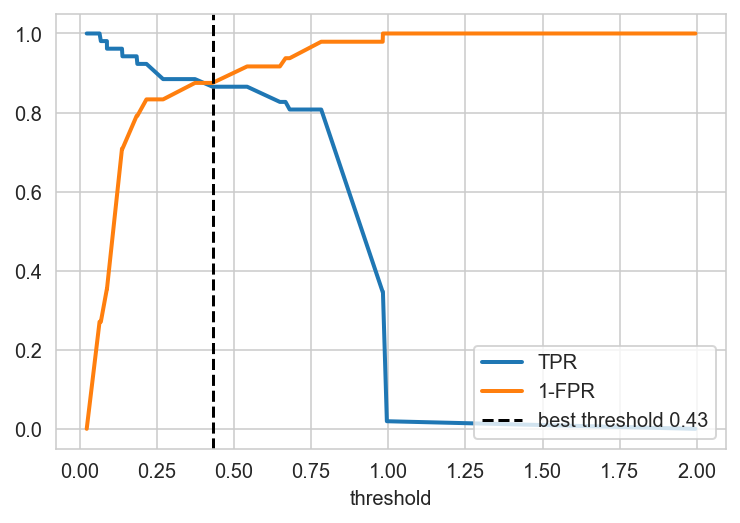

In [41]:
plt.plot(thresholds, tpr, lw = 2, label = r'TPR')
plt.plot(thresholds, 1-fpr, lw = 2, label = r'1-FPR')

threshold = thresholds[np.argmin((tpr - 1 + fpr)**2)]
plt.axvline(x=threshold,
            ls='--', c='black',
            label='best threshold {}'.format(round(threshold, 2)))
plt.xlabel(r'threshold')
plt.legend(loc="lower right")
plt.show();

# Assessment of the quality of two-class classification

Our sample consists of relevant and irrelevant elements.


\begin{equation}
    \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
\end{equation}

\begin{equation}
    \text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

In medical diagnostics:
\begin{equation}
    \text{Sensitivity} = \frac{\text{TP}}{\text{TP} + \text{FN}}
\end{equation}

\begin{equation}
    \text{Specificity} = \frac{\text{TN}}{\text{TN} + \text{FP}}
\end{equation}

`Sensitivity` - the proportion of correct positive diagnoses

`Specificity` - the proportion of correct negative diagnoses


![](https://drive.google.com/uc?export=view&id=1fqhNeKdWtDOXiOWOa7j3M2cqw2CtS45H)

# Accuracy and completeness of multiclass classification

For each class $y \in Y$:
* $\text{TP}_y$ - true positive
* $\text{FP}_y$ - false positives
* $\text{FN}_y$ - false negatives


Accuracy and completeness with `micro-averaging`:

\begin{equation}
    \text{Precision: } P = \frac{\sum_y\text{TP}_y}{\sum_y \big(\text{TP}_y + \text{FP}_y\big)}
\end{equation}

\begin{equation}
    \text{Recall: } R = \frac{\sum_y\text{TP}_y}{\sum_y \big(\text{TP}_y + \text{FN}_y\big)}
\end{equation}

`Micro-averaging` is not error-sensitive on small classes, i.e. micro-averaging is bad where we have unbalanced classes.


Accuracy and completeness with `macro-averaging`:

\begin{equation}
    \text{Precision: } P = \frac{1}{\vert Y \vert}\sum_y\frac{\text{TP}_y}{\text{TP}_y + \text{FP}_y}
\end{equation}

\begin{equation}
    \text{Recall: } R = \frac{1}{\vert Y \vert}\sum_y\frac{\text{TP}}{\text{TP}_y + \text{FN}_y}
\end{equation}

Macro-averaging is sensitive to errors in small classes.

# Assessment of classification quality
* If we have an imbalance of classes, then use the `ROC curve` and also `sensitivity` and `specificity'.
* Precision and recall are better suited for tasks when the proportion of objects of the relevant class is very small.

# Aggregated estimates:
* `AUC` is better suited for quality assessment when the error price ratio is not fixed
* $F_1 = \frac{2 PR}{P+R}$ - $F$ is a measure, another way of aggregating $P$ and $R$.

In [42]:
print(classification_report(
        Y_test, model.predict_proba(X_test)[:, 1] > 0.5))

              precision    recall  f1-score   support

           0       0.78      0.93      0.85        45
           1       0.93      0.78      0.85        55

    accuracy                           0.85       100
   macro avg       0.86      0.86      0.85       100
weighted avg       0.86      0.85      0.85       100



In [43]:
print(classification_report(
        Y_test, model.predict_proba(X_test)[:, 1] > threshold))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        45
           1       0.91      0.78      0.84        55

    accuracy                           0.84       100
   macro avg       0.84      0.85      0.84       100
weighted avg       0.85      0.84      0.84       100



# How to choose model hyperparameters

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc
from sklearn.metrics import f1_score, accuracy_score, average_precision_score

In [45]:
KNeighborsClassifier?

In [46]:
kNN =  KNeighborsClassifier()

param_knn = {'n_neighbors' : [5, 10, 15, 20], 'weights': ['uniform', 'distance']}
kNN_CV = GridSearchCV(kNN, param_grid=param_knn)
kNN_CV.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20],
                         'weights': ['uniform', 'distance']})

In [47]:
kNN_CV.best_params_

{'n_neighbors': 15, 'weights': 'uniform'}

In [48]:
pred_kNN_CV = kNN_CV.predict(X_test)
prob_kNN_CV = kNN_CV.predict_proba(X_test)[:, 1]

FPR_kNN_CV, TPR_kNN_CV, _ = roc_curve(Y_test, prob_kNN_CV)
roc_auc_kNN_CV = auc(FPR_kNN_CV, TPR_kNN_CV)

precision_kNN_CV, recal_kNN_CV, _ = precision_recall_curve(Y_test, prob_kNN_CV)
pr_auc_kNN_CV = average_precision_score(Y_test, prob_kNN_CV)

f1_kNN_CV = f1_score(Y_test, pred_kNN_CV)

print(r'ROC-AUC: %.2f' % roc_auc_kNN_CV)
print(r'PR-AUC: %.2f' % pr_auc_kNN_CV)
print(r'F1-score: %.2f' % f1_kNN_CV)

ROC-AUC: 0.94
PR-AUC: 0.95
F1-score: 0.87


#### Task 4

In [49]:
# plot roc curve


# The curse of dimensionality

Many algorithms that work well in small dimensions make many mistakes  when the input is multidimensional. The correct generalization becomes exponentially more difficult as the dimension (number of features) increases, because a fixed-size training set covers a shrinking part of the input space.

![](https://drive.google.com/uc?export=view&id=1nk-4C5wMGBHQpfeAq7dX-nofj4EGpjoF)

# Dimensionality reduction. The principal component analysis (PCA): problem statement


We have the `initial featrues` $\big(f_1(x),\ldots, f_n(x)\big)$. We want to somehow transform the original features to get some `new features` $\big(g_1(x),\ldots, g_m(x)\big)$, and $m\le n$.

`Requirement:`
* the old features $\big(f_1(x), \ldots, f_n(x)\big)$ must be linearly restored by the new $\big(g_1(x), \ldots, g_m(x)\big)$:
\begin{equation}
    \hat{f_j}(x) = \sum_{s=1}^{m} g_s(x) u_{js}, \quad j =1, \ldots, n, \quad \forall x \in X,
\end{equation}
where $\hat{f_j}(x)$ is the estimate of the initial feature $f_j(x)$, and this estimate should be close to all objects in the training sample $x_1, \ldots, x_{\ell}$:

\begin{equation}
    \sum_{i=1}^{\ell}\big(\sum_{j=1}^{n} \hat{f_j}(x_i) - f_j(x_i)\big)^2 → \min_{\{g_s(x_i)\}, ~\{u_{js}\}}
\end{equation}

`The basic idea:`

We have `initial features` and we want to build `new features`, meaning that there will be fewer new features than the original ones. But we want the original ones to be recovered well from a smaller number of new features. In fact, we want to achieve `information compression`.

# Matrix notation

`Matrices of "features":`

$F$ is `old` and $G$ is `new`:

\begin{equation*}
F =
\begin{pmatrix}
    f_1(x_1) & \dots & f_n(x_1) \\
    \vdots & \ddots & \vdots \\
    f_1(x_ℓ) & \dots & f_n(x_\ell)
\end{pmatrix}, \quad
G =
\begin{pmatrix}
    g_1(x_1) & \dots & g_m(x_1) \\
    \vdots & \ddots & \vdots \\
    g_1(x_ℓ) & \dots & g_m(x_\ell)
\end{pmatrix}
\end{equation*}

`Matrix` $U$ - is a linear transformation of new features into old ones:

\begin{equation*}
U =
\begin{pmatrix}
    u_{11} & \dots & u_{1m} \\
    \vdots & \ddots & \vdots \\
    u_{n1} & \dots & u_{nm}
\end{pmatrix}.
\end{equation*}

\begin{equation*}
    \hat{F} = GU^\top ≈ F.
\end{equation*}

`Find:` new features $G$, and linear transformation $U$:
\begin{equation*}
    \big\Vert G U^\top - F \big\Vert^2 \rightarrow \min_{G, ~U}
\end{equation*}

### Practice

In [50]:
from torchvision import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from tqdm import tqdm

In [51]:
MNIST_train = datasets.MNIST('./mnist', train=True, download=True)
X_train = MNIST_train.data.view([-1, 784]).cpu().numpy() # вектор 1 x 784
Y_train = MNIST_train.targets.cpu().numpy()

MNIST_test = datasets.MNIST('./mnist', train=False, download=True)
X_test = MNIST_test.data.view([-1, 784]).cpu().numpy()
Y_test = MNIST_test.targets.cpu().numpy()

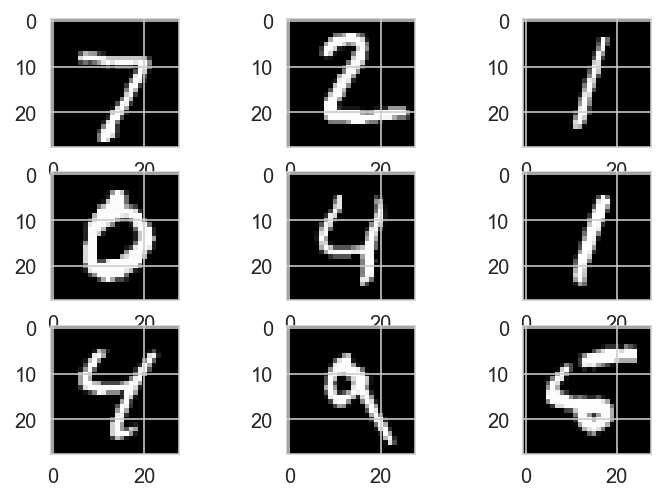

In [52]:
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(MNIST_test.data[i], cmap=plt.get_cmap('gray'))
plt.show()

In [53]:
print('X_train: ' + str(X_train.shape))
print('Y_train: ' + str(Y_train.shape))
print('X_test:  '  + str(X_test.shape))
print('Y_test:  '  + str(Y_test.shape))

X_train: (60000, 784)
Y_train: (60000,)
X_test:  (10000, 784)
Y_test:  (10000,)


In [54]:
X_train = X_train[:5000]
Y_train = Y_train[:5000]
X_test = X_test[:1000]
Y_test = Y_test[:1000]

Many algorithms are sensitive to deviations of the initial variables. That is, if there are large differences between the ranges of the original variables, then variables that have large ranges will dominate over variables with small ranges, which will lead to biased results. To avoid problems, it is important to standardize the data.

In [55]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [56]:
pca = PCA(2) # 2- number of components
X_train_low = pca.fit_transform(X_train_scaled)
X_test_low = pca.fit_transform(X_test_scaled)

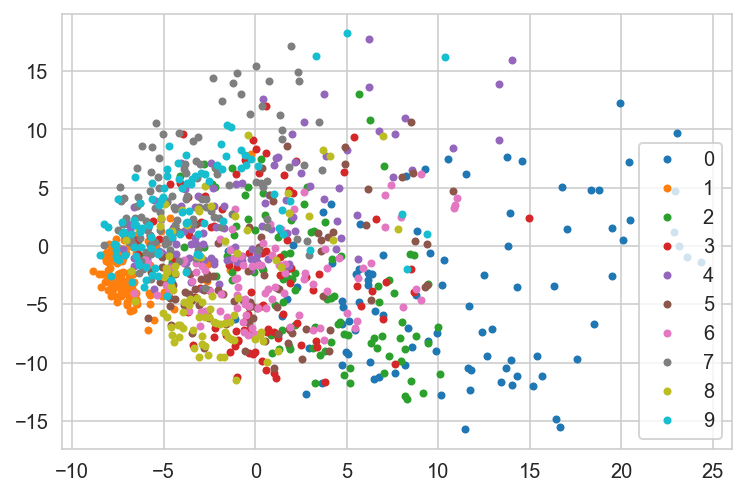

In [57]:
for k in np.unique(Y_train):
    idx = np.where(Y_train[:1000] == k)[0]
    plt.plot(X_train_low[idx, 0], X_train_low[idx, 1], '.', label = str(k))

plt.legend(loc='best')
plt.show();

In [58]:
acc_list, pc_list = [], []

for pc in tqdm(range(2, 101, 3)):
    pca = PCA(pc)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test)

    clf = RandomForestClassifier(n_estimators=100)

    clf.fit(X_train_pca, Y_train)

    y_preds = clf.predict(X_test_pca)

    acc = accuracy_score(Y_test, y_preds)

    acc_list.append(acc)
    pc_list.append(pc)

100%|██████████████████████████████████████████████████████████████████████████████████| 33/33 [01:49<00:00,  3.31s/it]


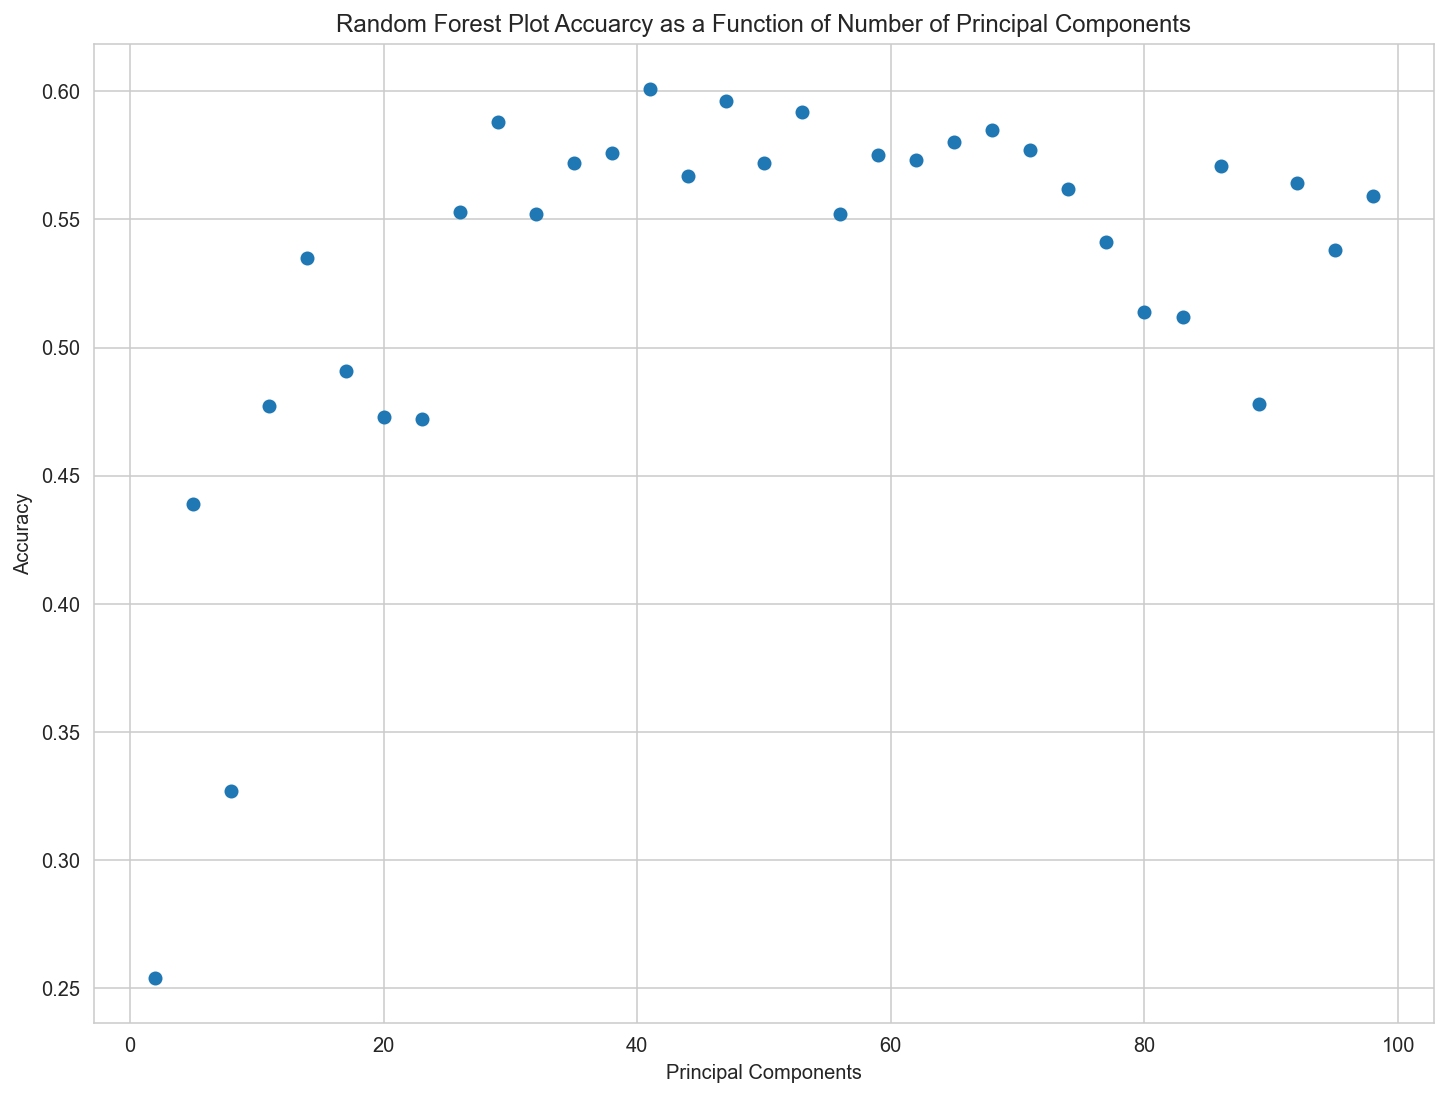

In [59]:
plt.figure(figsize=[12,9])
plt.scatter(pc_list, acc_list)
plt.title('Random Forest Plot Accuarcy as a Function of Number of Principal Components')
plt.xlabel('Principal Components')
plt.ylabel('Accuracy');

In [60]:
print(f'Max accuracy: {np.max(acc_list)}, with number of components: {pc_list[np.where(acc_list == np.max(acc_list))[0][0]]}')

Max accuracy: 0.601, with number of components: 41


### Presentation:
[Link to the presentation in Russian](https://docs.google.com/presentation/d/1nQq4_1QJT_kE3f8xgOCR_ZADZmE6O8hC/edit?usp=sharing&ouid=108809518155956876008&rtpof=true&sd=true)